In [1]:
from femtoPy.imports import *
import femtoPy.diffusion.diffusion as diff
import femtoPy.absorption as Abs

plt.rcParams.update({'figure.autolayout':True})

%matplotlib inline

def update(dist):
    dist.prep()
    dist.dif()
    dist.boundary()
    dist.step()
    dist.D=dist.update_D
    
    return

'Empirical relationship between scattering rate and photoexcited density'
def Caughey_Thomas(N=np.logspace(-4,0,100),N0=1.05,tMax=375,tMin=5,alpha=0.22):
    tau=(tMax-tMin)
    tau=tau/(1+(N/N0)**alpha)+tMin

    return tau

'Carrier mobility as a function of effective mass, charge, and scattering rate'
def mobility(mStar=0.067*9.11e-31,tau=3.2e-13,q=1.6e-19):
    return q*tau/mStar

'calculate diffusion coefficient using mobility and temperature'
def diffusion_coefficient(mu=0.85,T=300):
    return 1.38e-23*T*mu/1.6e-19

'calculate ambipolar mobility from electron and hole mobility'
def ambipolar_mobility(mu_h=0.04,mu_e=0.85):
    return mu_h*mu_e/(mu_h+mu_e)


(201, 1001)


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


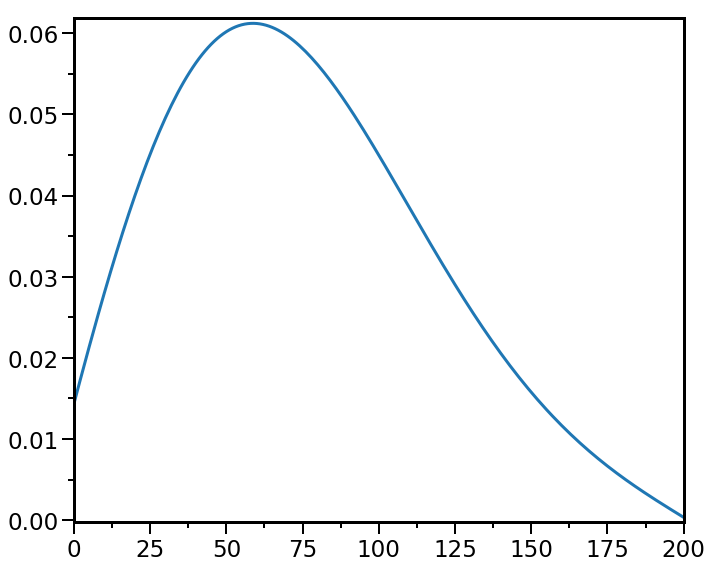

In [3]:
def update(dist):
    dist.prep()
    dist.dif()
    dist.boundary()
    dist.update_D()
    dist.step()

    return

'Grid parameters'
dt=.01
dy=.05
y_min=0
y_max=10
t_min=0
t_max=10

grid=diff.grid(dt=dt,dy=dy,y_min=y_min,y_max=y_max,t_min=t_min,t_max=t_max)

'Material and relaxation parameters'
s=1
ue=.85
uh=.04
T=np.zeros(np.arange(t_min,t_max+dt,dt).size)+300
e=1.6e-19
A=1./2.1
B=1.

'Excitation parameters'
alpha0=0.99
d0=np.exp(-alpha0*grid.y)

'distribution'
e=diff.dist(grid,weight=1,d0=d0,s=s,T=T)
e.update_D()

for i in range(grid.t.size-1):
    update(e)
print(e.density.shape)
fig,ax=figure()
ax.plot(e.density[:,-1])

(201, 1001)


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


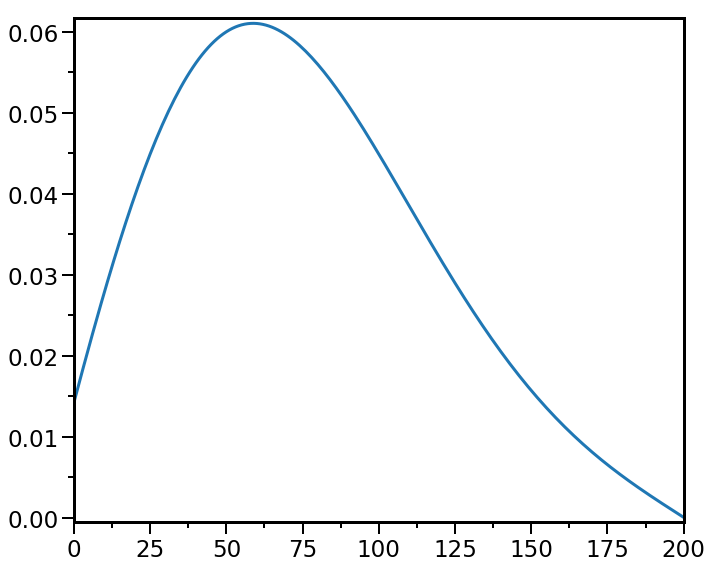

In [5]:
def update(dist):
    dist.prep()
    dist.dif()
    dist.boundary()
    dist.update_D()
    dist.step()

    return

'Grid parameters'
dt=.01
dy=.05
y_min=0
y_max=10
t_min=0
t_max=10

grid=diff.grid(dt=dt,dy=dy,y_min=y_min,y_max=y_max,t_min=t_min,t_max=t_max)

'Material and relaxation parameters'
s=1
ue=.85
uh=.04
T=np.zeros(np.arange(t_min,t_max+dt,dt).size)+300
e=1.6e-19
A=1./2.1
B=1.

'Excitation parameters'
alpha0=0.99
d0=np.exp(-alpha0*grid.y)

'distribution'
e=diff.dist(grid,weight=1,d0=d0,s=s,T=T)
e.update_D()

for i in range(grid.t.size-1):
    update(e)
print(e.density.shape)
fig,ax=figure()
ax.plot(e.density[:,-1])

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


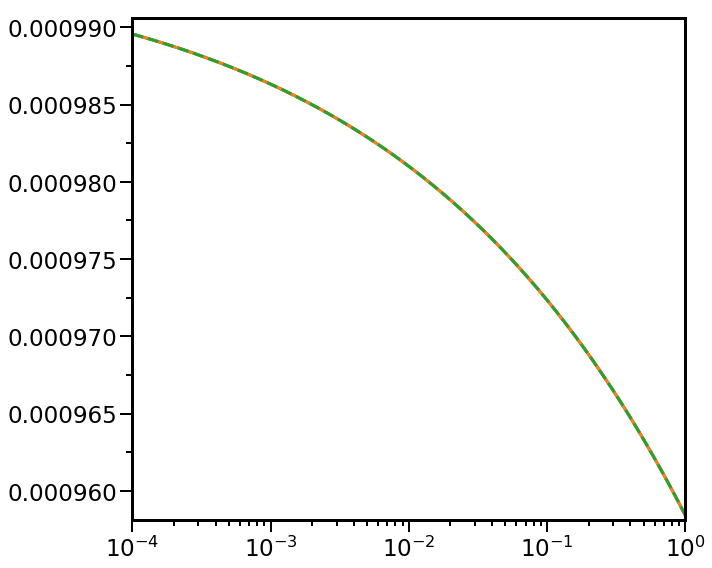

In [2]:
def update(dist):
    dist.prep()
    dist.dif()
    dist.boundary()
    dist.update_D()
    dist.step()

    return

'Grid parameters'
dt=.01
dy=.05
y_min=0
y_max=10
t_min=0
t_max=200

grid=diff.grid(dt=dt,dy=dy,y_min=y_min,y_max=y_max,t_min=t_min,t_max=t_max)

'Material and relaxation parameters'
s=1
ue=.85
uh=.04
T=np.zeros(np.arange(t_min,t_max+dt,dt).size)+300
e=1.6e-19
A=1./2.1
B=1.

'Excitation parameters'
alpha0=0.99
d0=np.exp(-alpha0*grid.y)

'distribution'
e=diff.dist(grid,weight=1,d0=d0,s=s,T=T)
e.update_D()

for i in range(grid.t.size-1):
    update(e)
    
N=np.empty(grid.t.size)
for i in range(grid.t.size):
    N[i]=np.amax(e.density[:,i])
    
t=np.asarray(grid.t.T)[:,0]    

fig,ax=figure()

tau_e=Caughey_Thomas(N)*10**-15
mu=mobility(tau=tau_e)
mu_a=ambipolar_mobility(mu_e=mu)
D=diffusion_coefficient(mu_a,300)

ax.plot(N,D)
ax.plot(N,e.D)
ax.set_xscale('log')
ax.set_xlim(10**-4,10**0)

'testing scaling of N'
N=np.logspace(-4,0,100)
N0=1.05

tauMax=375
tauMin=5
alpha=0.22
tau=diff.Caughey_Thomas(N,N0,tauMax,tauMin,alpha)
mu=diff.mobility(tau=tau*10**-15)
muEff=diff.ambipolar_mobility(mu_e=mu,mu_h=0.04)
D=diff.diffusion_coefficient(muEff,T=300)

ax.plot(N,D,linestyle='--')

(0.0007, 0.0011)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


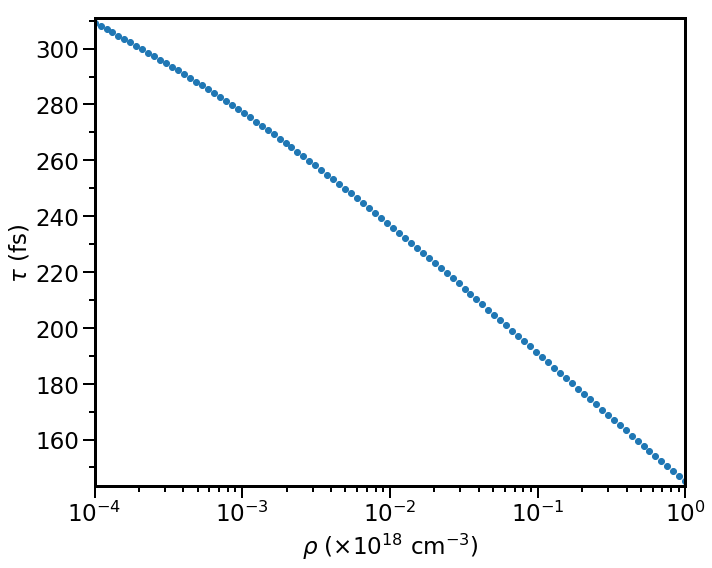

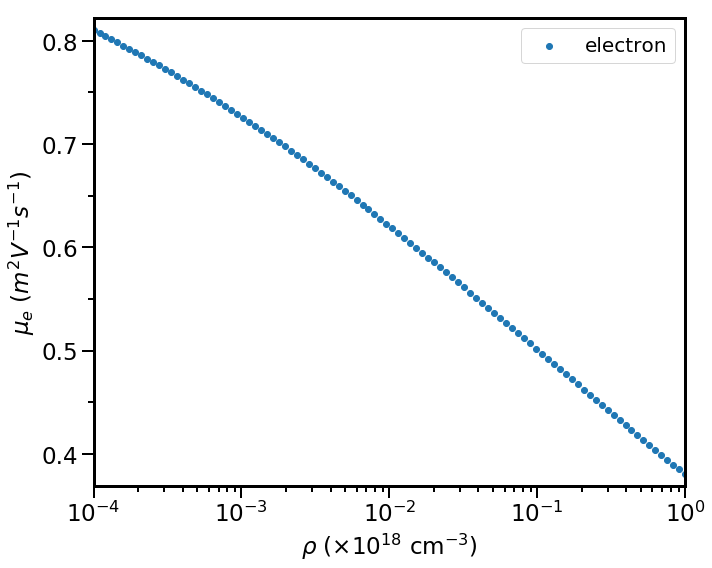

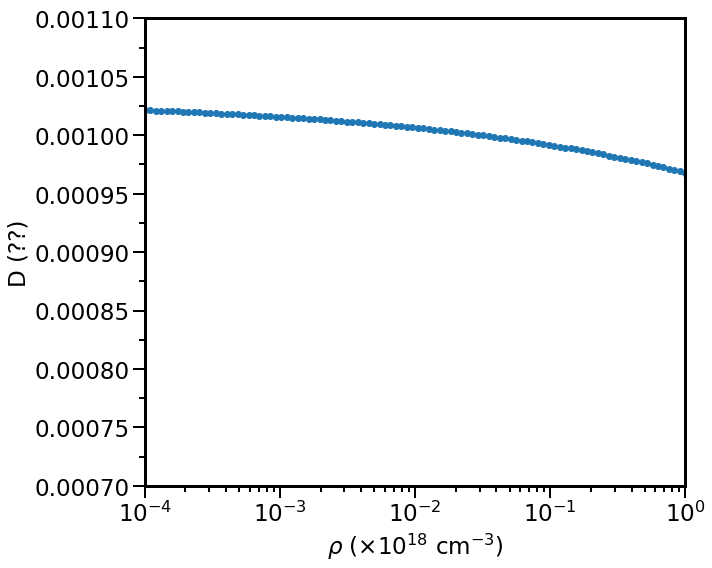

In [3]:
'testing scaling of N'
N=np.logspace(-4,0,100)
N0=.105

tauMax=375
tauMin=5
alpha=0.22

tau=diff.Caughey_Thomas(N,N0,tauMax,tauMin,alpha)

fig,ax=figure()
ax.scatter(N,tau)
ax.set_xscale('log')
ax.set_xlim(10**-4,10**0)

ax.set_ylabel(r'$\tau$ (fs)')
ax.set_xlabel(r'$\rho$ ($\times$10$^{18}$ cm$^{-3}$)')


mu=diff.mobility(tau=tau*10**-15)
muEff=diff.ambipolar_mobility(mu_e=mu,mu_h=0.0415)
fig,ax=figure()
ax.scatter(N,mu,label='electron')
# ax.scatter(N,muEff,label='ambipolar')
ax.set_xscale('log')
ax.set_xlim(10**-4,10**0)
ax.legend()

ax.set_ylabel(r'$\mu_{e}$ ($m^2V^{-1}s^{-1}$)')
ax.set_xlabel(r'$\rho$ ($\times$10$^{18}$ cm$^{-3}$)')

D=diff.diffusion_coefficient(muEff,T=300)
fig,ax=figure()
ax.scatter(N,D)
ax.set_xscale('log')
ax.set_xlim(10**-4,10**0)

ax.set_ylabel(r'D (??)')
ax.set_xlabel(r'$\rho$ ($\times$10$^{18}$ cm$^{-3}$)')

ax.set_ylim(0.0007,0.0011)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


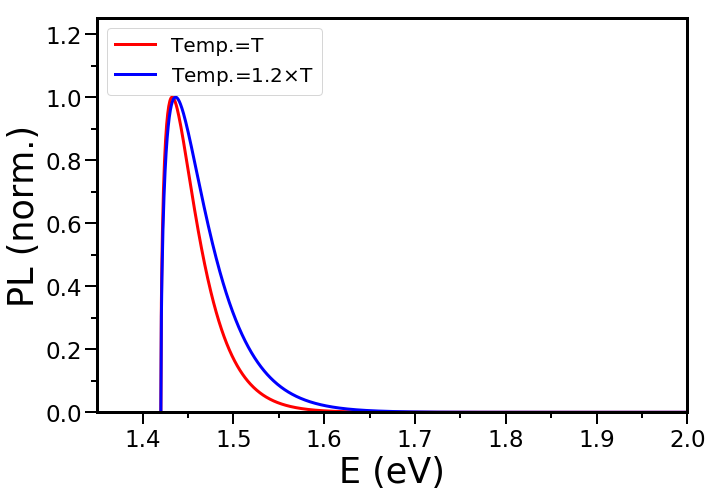

In [142]:
def PLspec(E,Eg,T):
    PL=np.zeros(E.size)
    loc=np.amin(np.where(E>Eg))
    PL[loc:]=np.sqrt(E[loc:]-Eg)*np.exp(-(E[loc:]-Eg)/T)
    return PL/np.amax(PL)

def dos(E,Eg):
    DOS=np.zeros(E.size)
    loc=np.amin(np.where(E>Eg))
    DOS[loc:]=np.sqrt(E[loc:]-Eg)
    return DOS/np.amax(DOS)

def boltzmann(E,Eg,T):
    f=np.exp(-(E-Eg)/T)
    return f/np.amax(f)

E=np.linspace(1.42,2.0,1000)
Eg=1.42
T=.025
PL=PLspec(E,Eg,T)
DOS=dos(E,Eg)
# f=boltzmann(E,Eg,T)

fig,ax=figure(figsize=(10,7))
ax.plot(E,PL,color='r',label='Temp.=T')

# ax.plot(E,DOS,color='r',linestyle='--')
# ax.plot(E,f,color='b',linestyle='--')

T=1.3*T
PL=PLspec(E,Eg,T)
# f=boltzmann(E,Eg,T)


# ax.plot(E,DOS,color='r',linestyle='--')
# ax.plot(E,f,color='r',linestyle='--')
ax.plot(E,PL,color='b',label=r'Temp.=1.2$\times$T')
ax.set_xlabel(r'E (eV)',fontsize=35)
ax.set_ylabel(r'PL (norm.)',fontsize=35)

# ax.set_xticks([])
# ax.set_yticks([])

ax.set_xlim(1.35,np.amax(E))
ax.set_ylim(0,1.25)

ax.legend(loc=2)

# ax.axvline(1.42,color='k',linestyle='--')

plt.savefig('low temp PL spec.png')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


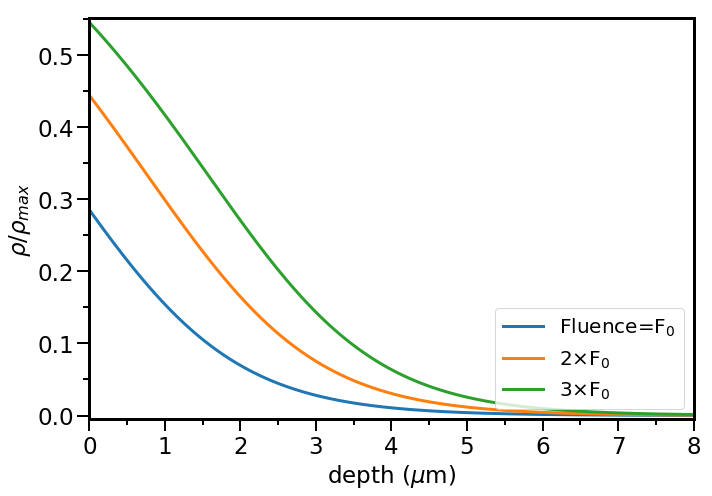

In [2]:
I1=1.2
alpha=1
Imax=1
d=np.linspace(0,8,1000)
I,dI=Abs.saturation(I1,alpha,Imax,d)
N1=-dI/(d[1]-d[0])

I2=.4
I,dI=Abs.saturation(I2,alpha,Imax,d)
N2=-dI/(d[1]-d[0])

I3=.8
I,dI=Abs.saturation(I3,alpha,Imax,d)
N3=-dI/(d[1]-d[0])

fig,ax=figure(figsize=(10,7))
ax.plot(d,N2,label=r'Fluence=F$_0$')
ax.plot(d,N3,label=r'2$\times$F$_0$')
ax.plot(d,N1,label=r'3$\times$F$_0$')

ax.set_xlabel('depth ($\mu$m)')
ax.set_ylabel(r'$\rho/\rho_{max}$')

ax.legend(loc=4)

fig.savefig('absorption saturation.png')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


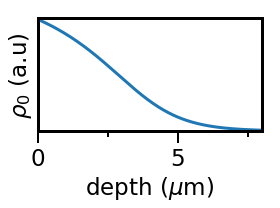

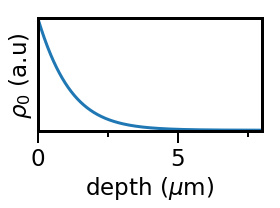

In [14]:
I1=2
alpha=1
Imax=1
d=np.linspace(0,8,1000)
I,dI=Abs.saturation(I1,alpha,Imax,d)
N1=-dI/(d[1]-d[0])

fig,ax=figure(figsize=(4,3))
ax.plot(d,N1/np.amax(N1),label=r'3$\times$F$_0$')

ax.set_xlabel(r'depth ($\mu$m)')
ax.set_ylabel(r'$\rho_0$ (a.u)')

ax.set_yticks([])

fig.savefig('high fluence.pdf')

I1=0.1
alpha=1
Imax=1
d=np.linspace(0,8,1000)
I,dI=Abs.saturation(I1,alpha,Imax,d)
N1=-dI/(d[1]-d[0])

fig,ax=figure(figsize=(4,3))
ax.plot(d,N1/np.amax(N1),label=r'3$\times$F$_0$')

ax.set_xlabel(r'depth ($\mu$m)')
ax.set_ylabel(r'$\rho_0$ (a.u)')

ax.set_yticks([])

fig.savefig('low fluence.pdf')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


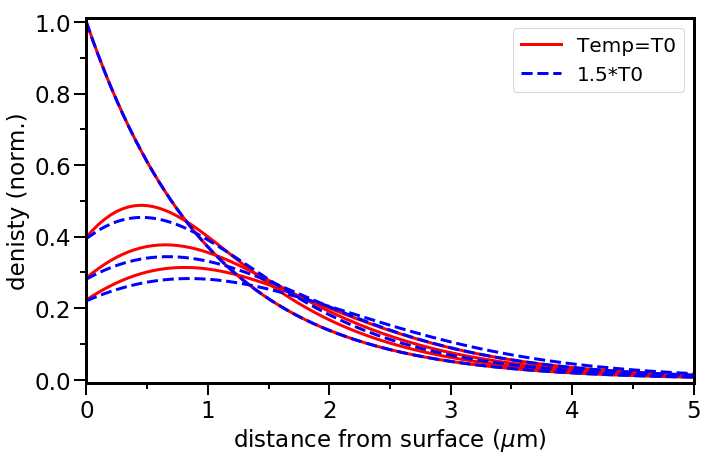

In [174]:
'Grid parameters'
dt=.01
dy=.05
y_min=0
y_max=10
t_min=0
t_max=2

grid=diff.grid(dt=dt,dy=dy,y_min=y_min,y_max=y_max,t_min=t_min,t_max=t_max)

'Material parameters'
s=1
ue=.85
uh=.04
T=np.zeros(np.arange(t_min,t_max+dt,dt).size)+300

e=1.6e-19
A=1./2.1
B=1.

'Excitation parameters'
alpha0=0.99
d0=np.exp(-alpha0*grid.y)

'distribution'
e=diff.dist(grid,weight=1,d0=d0,s=s,D=1)
e2=diff.dist(grid,weight=1,d0=d0,s=s,D=1.5)

for i in range(grid.t.size-1):
    update(e)
    update(e2)
    
Y,T=np.meshgrid(grid.t,grid.y)
    
# fig,ax=figure()
# ax.contourf(Y,T,e.density)
# ax.set_ylabel('depth ($\mu$m)')
# ax.set_xlabel('time (ns)')

fig,ax=figure(figsize=(10,6.5))
plt.tight_layout()
ax.plot(grid.y,e.density[:,0],label='Temp=T0',color='r')
for i in range(1,4,1):
    if i==20 or i==20:
        ax.plot(grid.y,e.density[:,10*i],label=str(grid.t[0,i*10])+' ns')
    else:
        ax.plot(grid.y,e.density[:,20*i],color='r')#,label=grid.t[0,i*20])
        
ax.plot(grid.y,e2.density[:,0],label='1.5*T0',linestyle='--',color='b')
for i in range(1,4,1):
    if i==20 or i==20:
        ax.plot(grid.y,e2.density[:,10*i],label=str(grid.t[0,i*10])+' ns',linestyle='--',color='b')
    else:
        ax.plot(grid.y,e2.density[:,20*i],linestyle='--',color='b')#,label=grid.t[0,i*20])
ax.set_xlim(0,5)

ax.set_ylabel('denisty (norm.)')
ax.set_xlabel('distance from surface ($\mu$m)')
ax.legend()

fig.savefig('density as a function of depth.png')

In [7]:
print(0.85/1.6e-19*0.067*9.11e-31*10**12)
print(0.0388*300*1.38e-23/1.6e-19)

0.3242590625
0.0010039500000000002
